In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
from mpl_toolkits.mplot3d import Axes3D

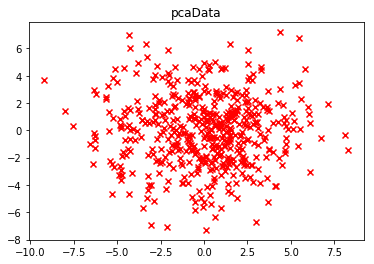

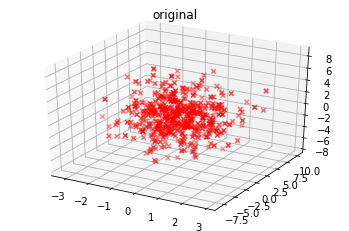

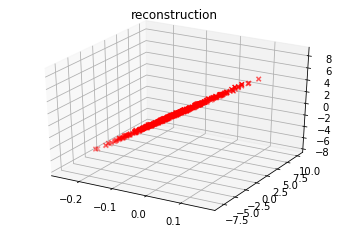

In [2]:
def generate_data():
    mean = [0, 0, 0]
    cov = [[1, 0, 0], [0, 8, 0], [0, 0, 8]]
    size = 500
    mean1 = [6, 6, 6]
    cov1 = [[8, 0, 0], [0, 1, 0], [0, 0, 8]]
    x = np.random.multivariate_normal(mean, cov, size)
    #     x1 = np.random.multivariate_normal(mean1, cov1, size)
    x = np.mat(x)
    #     x1 = np.mat(x1)
    #     data = np.row_stack((x, x1))
    data = x
    # 将点进行旋转
    rotaMatx = [[]]
    return data, size


def pca(data, k):
    mean = np.mean(data, axis=0)
    data_size, dim = np.shape(data)
    avgs = np.tile(mean, (data_size, 1))
    data_adjust = data - avgs
    covX = np.cov(data_adjust.T)  #计算协方差矩阵
    ftVal, ftVec = np.linalg.eig(covX)  #求解协方差矩阵的特征值和特征向量
    index = np.argsort(-ftVal)  #按照featValue进行从大到小排序
    pcaData = None
    if k > data_size:
        print("k must lower than feature number")
        return
    else:
        #注意特征向量时列向量，而numpy的二维矩阵(数组)a[m][n]中，a[1]表示第1行值
        selectVec = np.mat(ftVec.T[index[:k]])  #所以这里需要进行转置
        pcaData = data_adjust * selectVec.T
    return pcaData, selectVec, mean


def reconstruction(pcaData, ftVec, mean):
    return pcaData * ftVec + mean


def calPSNR(data, reconData):
    m, n = np.shape(data)
    diff = data - reconData
    v = 0
    for i in range(m):
        v += np.linalg.norm(diff[i, :])**2
    v /= (m * n)
    return 10 * np.log10(255 * 255 / v)


def test_generate_data():
    x, size = generate_data()
    pcaData, ftVec, mean = pca(x, 2)
    recon = reconstruction(pcaData, ftVec, mean)
    plt.scatter(pcaData[:size, 0].tolist(),
                pcaData[:size, 1].tolist(),
                c='r',
                marker='x')
    plt.scatter(pcaData[size:, 0].tolist(), pcaData[size:, 1].tolist(), c='g')
    plt.title('pcaData')
    plt.show()
    ax = plt.subplot(111, projection='3d')  # 创建一个三维的绘图工程
    ax.scatter(x[:size, 0].tolist(),
               x[:size, 1].tolist(),
               x[:size, 2].tolist(),
               c='r',
               marker='x')  # 绘制数据点
    ax.scatter(x[size:, 0].tolist(),
               x[size:, 1].tolist(),
               x[size:, 2].tolist(),
               c='g')  # 绘制数据点
    plt.title('original')
    plt.show()
    ax = plt.subplot(111, projection='3d')  # 创建一个三维的绘图工程
    ax.scatter(recon[:size, 0].tolist(),
               recon[:size, 1].tolist(),
               recon[:size, 2].tolist(),
               c='r',
               marker='x')  # 绘制数据点
    ax.scatter(recon[size:, 0].tolist(),
               recon[size:, 1].tolist(),
               recon[size:, 2].tolist(),
               c='g')  # 绘制数据点
    plt.title('reconstruction')
    plt.show()


test_generate_data()